In [70]:
import scipy
import glob
import matplotlib.image as img
import matplotlib.pyplot as plt
import numpy as np
import itertools
%matplotlib inline

In [2]:
test_path = '/Users/YINAN/Local/Sea-lions/Patches/test/'
sealion_classes = ['adult_females', 'adult_males', 'subadult_males', 'juveniles', 'backgrounds', 'pups']

In [6]:
x = test_path + sealion_classes[0]
y = glob.glob(x+'/*.jpg')[0]

In [10]:
img.imread(y).shape

(96, 96, 3)

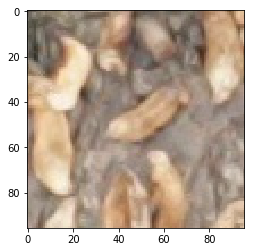

In [17]:
plt.imshow(img.imread(y))

In [20]:
sealion_patches_dic = {}
for c in sealion_classes:
    sealion_patches_dic[c] = [] 
    path = test_path + c + '/*.jpg'
    patches = glob.glob(path)
    for p in patches:
        sealion_patches_dic[c].append(img.imread(p))
    print(c + 'is done')

adult_femalesis done
adult_malesis done
subadult_malesis done
juvenilesis done
backgroundsis done
pupsis done


In [53]:
classes_index = {'adult_females': 0,'adult_males': 1,'backgrounds': 2,'juveniles': 3,'pups': 4,'subadult_males': 5}
X = []
Y = []
for c in sealion_classes:
    Y += [classes_index[c]] * len(sealion_patches_dic[c])
    X = [[x] for x in Y]

In [95]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)
clf = DummyClassifier(strategy='stratified', constant=0)
clf.fit(X_train, Y_train)

DummyClassifier(constant=0, random_state=None, strategy='stratified')

In [96]:
clf.score(X_test, Y_test)

0.68141049268951959

In [97]:
clf.predict(X_test)

array([2, 2, 2, ..., 2, 2, 2])

In [98]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] + 1e-6
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [99]:
from sklearn.metrics import confusion_matrix
mc = confusion_matrix(Y_test, clf.predict(X_test))

Normalized confusion matrix
[[ 0.08169697  0.01602996  0.81747773  0.04084898  0.03878073  0.00517163]
 [ 0.07942338  0.01083132  0.83032591  0.03249197  0.0433223   0.00361111]
 [ 0.07832541  0.01156198  0.82308293  0.04309194  0.03723637  0.00670737]
 [ 0.07345839  0.01567191  0.81978552  0.04701373  0.04015771  0.00391873]
 [ 0.0785655   0.00970032  0.83220275  0.03588849  0.03685842  0.00679052]
 [ 0.0982669   0.01156169  0.75722643  0.06936516  0.05780447  0.00578135]]


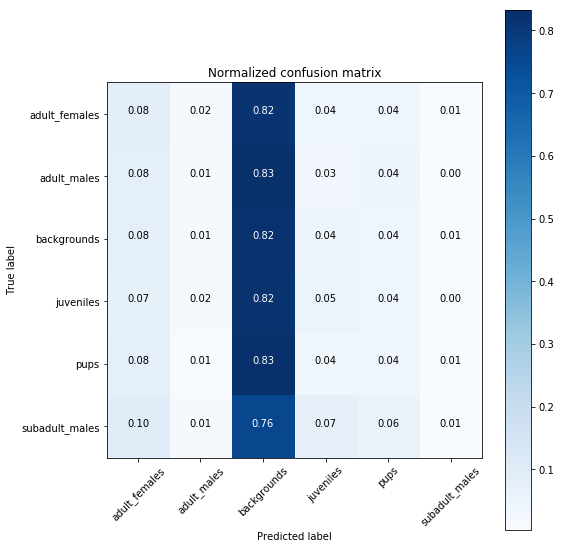

In [100]:
plt.figure()
plot_confusion_matrix(mc, classes=list(classes_index.keys()), normalize=True,
                      title='Normalized confusion matrix')
plt.show()